# Introducción a la Modelación Matemática con Python

Este cuaderno está diseñado como un complemento práctico a la sesión teórica **"Teoría y Conceptos de Modelación"**. Su propósito es explorar e ilustrar principios clave de modelación mediante simulaciones y visualizaciones en Python.

---

## Objetivos

A lo largo de este cuaderno, vamos a:

- Comparar modelos físicos y empíricos  
- Analizar enfoques de modelación determinista vs. probabilista  
- Explorar el comportamiento de sistemas lineales y no lineales  

---

## Estudio de Caso: El Saltador de Bungee

Para contextualizar estos conceptos, modelaremos el movimiento de una persona realizando un salto en bungee. Iremos aumentando progresivamente la complejidad del modelo:

1. Modelar únicamente el efecto de la gravedad  
2. Añadir la resistencia del aire  
3. Incorporar la fuerza elástica de la cuerda de bungee  

Al resolver el sistema tanto de forma analítica como numérica, obtendrás una comprensión práctica sobre cómo diferentes suposiciones afectan los resultados del modelo y cómo las herramientas computacionales pueden ayudar a analizar sistemas dinámicos.




# **1. Primer Planteamiento: Modelo Básico con Solo la Gravedad**

Primero, consideremos que el único factor que afecta al saltador es la gravedad. Aplicamos la segunda ley de Newton:

$$F = m*a$$

$F$ = Fuerza de arrastre


> Añadir blockquote


$m$ = Peso del saltador

$a$ = aceleración por la fuerza de gravedad $(g)$

Cómo la fuerza es constante, la aceleración también lo será:

$a$ = $g$ = $9.81 m/s^2$


### 1. Velocidad

Si suponemos que la velocidad inicial es $( v_0 = 0 )$ y la posición inicial es $( y_0 = 0 )$, la ecuación de la velocidad es:

$v(t) = g t + v_0$


### 2. Posición

De manera similar, la ecuación de la posición se expresa como:

$y(t) = \frac{1}{2} g t^2 + y_0$


###**1.1. Solución Explícita (Usando las Fórmulas)**

Calcular la velocidad y la posición con las fórmulas analíticas

$$\frac{dv}{dt} = g * t$$

$$\frac{dy}{dt} = 0.5 * g * t^2$$

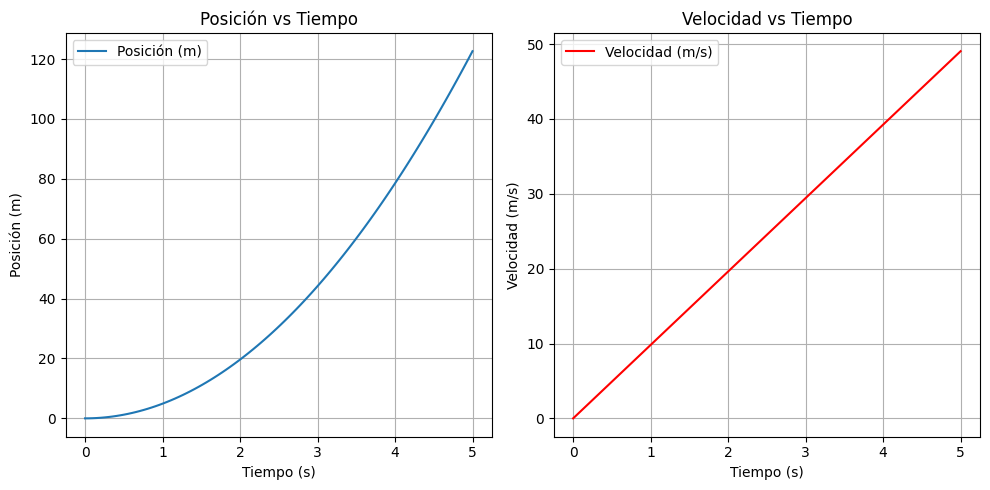

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la gravedad
g = 9.81  #m/s^2

# Definir el tiempo
t = np.linspace(0, 5, 100)  # De 0 a 5 segundos con 100 puntos

# Calcular la velocidad y la posición con las fórmulas analíticas
dv_dt = g * t
dy_dt = 0.5 * g * t**2

# Graficar los resultados
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, dy_dt, label="Posición (m)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Posición vs Tiempo")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, dv_dt, label="Velocidad (m/s)", color='r')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs Tiempo")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

###**1.2. Solución Numérica (Usando solve_ivp)**

## Solución de Ecuaciones Diferenciales Ordinarias con `solve_ivp`

La función `solve_ivp` del módulo `scipy.integrate` se utiliza para resolver **ecuaciones diferenciales ordinarias (EDOs)** en Python. Esta función es muy versátil y permite resolver sistemas de EDOs de primer orden en un intervalo de tiempo determinado.

### Sintaxis básica

```python

from scipy.integrate import solve_ivp

sol = solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, args=None)

# fun: función que define el sistema de ecuaciones diferenciales. Debe tener la forma f(t, y).
# t_span: tupla (t0, tf) que indica el intervalo de integración.
# y0: condiciones iniciales. Puede ser un escalar o un vector, dependiendo del sistema.
# method: método numérico a usar. Ejemplos: 'RK45', 'RK23', 'Radau', 'BDF', 'LSODA'.
# t_eval: (opcional) lista o arreglo de tiempos en los que se desea obtener la solución.
# args: (opcional) tupla con argumentos adicionales para pasar a fun.

# SOLUCION.
#sol.t   # Array con los valores de tiempo evaluados
#sol.y   # Array con los valores de la solución en cada punto de tiempo
#sol.success  # Indica si la solución fue exitosa
#sol.message  # Mensaje sobre el estado de la integración


```

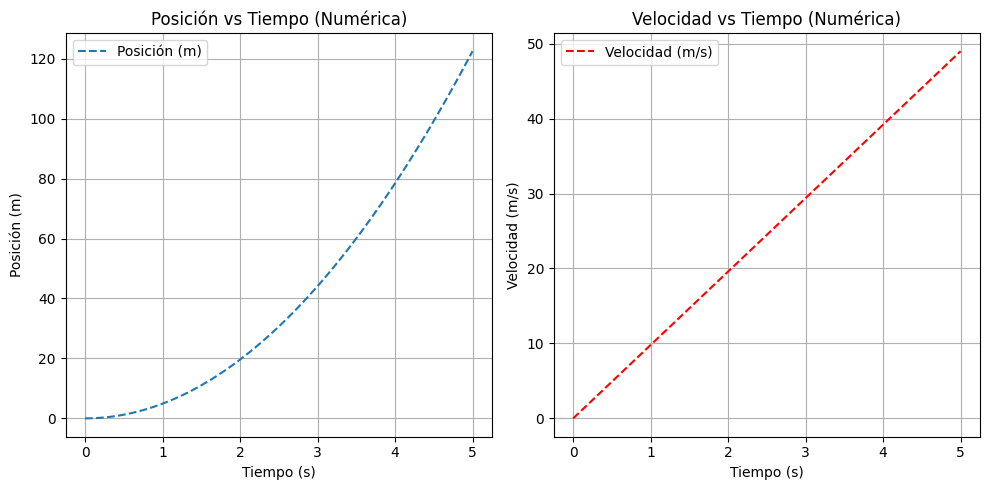

In [2]:
from scipy.integrate import solve_ivp

# Definir la ecuación diferencial
def bungee_jumper(t, Y):
    y, v = Y  # Vector con las variables del sistema: posición y velocidad
    dy_dt = v # La derivada de la posición es la velocidad
    dv_dt = g # La derivada de la velocidad es igual a la aceleración
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la ecuación diferencial
g = 9.8  #Aceleración de la gravedad
def bungee_jumper(t, Y):
    y, v = Y  # Vector con las variables del sistema: posición y velocidad
    dy_dt = v # La derivada de la posición es la velocidad
    dv_dt = g # La derivada de la velocidad es igual a la aceleración
    return [dy_dt, dv_dt]

sol = solve_ivp(bungee_jumper, (0,5), [0, 0], method='RK45', t_eval=np.linspace(0, 5, 100))

t = sol.t
y = sol.y[0]
v = sol.y[1]

# Graficar los resultados numéricos
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, y, label="Posición (m)", linestyle="dashed")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Posición vs Tiempo (Numérica)")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, v, label="Velocidad (m/s)", linestyle="dashed", color='r')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs Tiempo (Numérica)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#**2. Segundo Planteamiento: Gravedad + Resistencia del Aire**




###**2.1. Solución Explícita (Usando las Fórmulas)**

*Velocidad terminal:* $v_t = \sqrt{\frac{m*g}{c}}$

*Velocidad:* $ v(t) = v_t \tanh\left(\frac{g}{v_t} t\right) $

*Posición:* $y(t) = \frac{v_t^2}{g} * log(\cosh(\frac{g}{v_t} * t))$

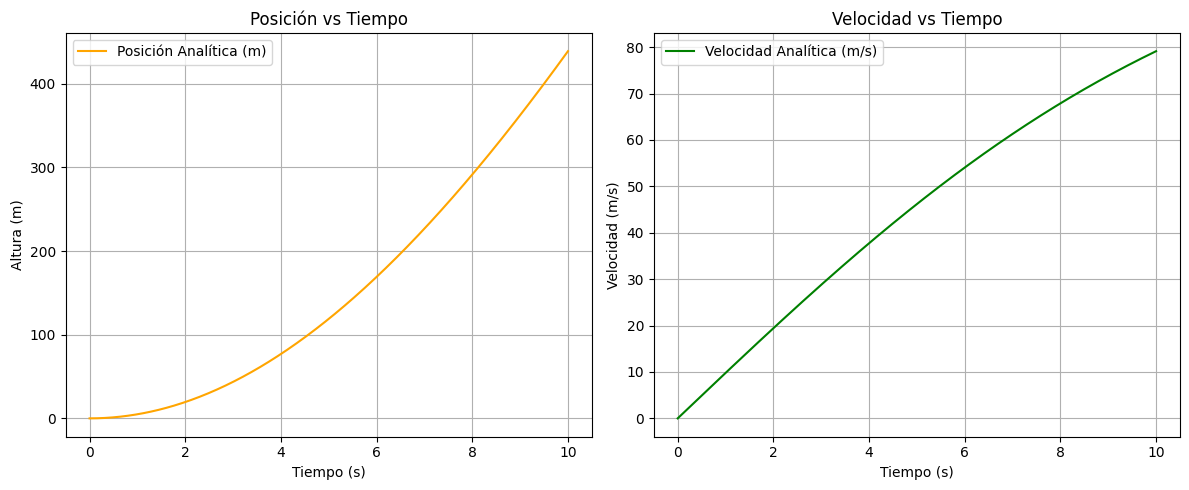

In [3]:
# Reimportar bibliotecas después del reinicio
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
m = 70  # masa del saltador (kg)
g = 9.81  # aceleración de la gravedad (m/s^2)

# Parámetros de resistencia del aire
Cd = 0.7  # Coeficiente de arrastre para un humano en posición vertical
rho = 1.225  # Densidad del aire (kg/m^3)
D = 0.4  # Diámetro aproximado del cuerpo (m)
A = (np.pi / 4) * D**2  # Área frontal (m^2)
c = 0.5 * Cd * rho * A  # Coeficiente de arrastre aerodinámico

# Tiempo de simulación
t_vals = np.linspace(0, 10, 500)  # Valores de tiempo de 0 a 10 s

# Soluciones analíticas
v_terminal = np.sqrt(m * g / c)  # Velocidad terminal
v_analitica = v_terminal * np.tanh(g * t_vals / v_terminal)
y_analitica = (v_terminal**2 / g) * np.log(np.cosh(g * t_vals / v_terminal))


# Ajustar las gráficas para que se muestren en disposición horizontal
plt.figure(figsize=(12, 5))  # Ajustar el tamaño para una disposición horizontal

# Gráfico de posición (izquierda)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(t_vals, y_analitica, label="Posición Analítica (m)", color="orange")
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")
plt.title("Posición vs Tiempo")
plt.legend()
plt.grid()

# Gráfico de velocidad (derecha)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(t_vals, v_analitica, label="Velocidad Analítica (m/s)", color="green")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs Tiempo")
plt.legend()
plt.grid()

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()



###**2.2. Solución Numércia (Usando solve_ivp)**

Este enfoque numérico resuelve la ecuación diferencial de caída con resistencia del aire:

*Velocidad:* $$F_g = m * g   \quad\quad\quad\quad   F_a = -cv|v|$$

$$m\frac{dv}{dt} =  F_g + F_a$$

$$\frac{dv}{dt} = g - \frac{c}{m}  v^2$$

*Posición:* $$\frac{dy}{dt} = v $$

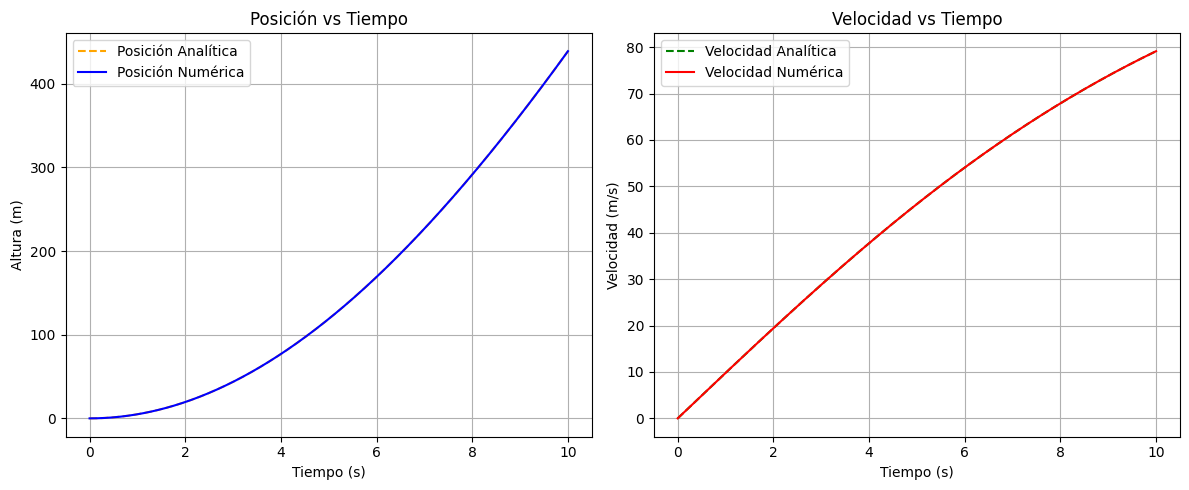

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros físicos
m = 70  # Masa del saltador (kg)
g = 9.81  # Aceleración de la gravedad (m/s^2)

# Parámetros de resistencia del aire
Cd = 0.7  # Coeficiente de arrastre para un humano en posición vertical
rho = 1.225  # Densidad del aire (kg/m^3)
D = 0.4  # Diámetro aproximado del cuerpo (m)
A = (np.pi / 4) * D**2  # Área frontal (m^2)
c = 0.5 * Cd * rho * A  # Coeficiente de arrastre aerodinámico

# Tiempo de simulación
t_span = (0, 10)  # Intervalo de tiempo de 0 a 10 segundos
t_vals = np.linspace(0, 10, 500)  # Puntos para evaluar la solución

# Condiciones iniciales
v0 = 0  # Velocidad inicial
y0 = 0  # Altura inicial

# Función del sistema de ecuaciones diferenciales
def ecuacion_movimiento(t, Y):
    y, v = Y
    dv_dt = g - (c/m) * v**2  # Ecuación diferencial para la velocidad
    dy_dt = v  # La derivada de la posición es la velocidad
    return [dy_dt, dv_dt]

# Resolver la ecuación diferencial
sol = solve_ivp(ecuacion_movimiento, t_span, [y0, v0], t_eval=t_vals, method='RK45')

# Extraer las soluciones numéricas
y_numerica = sol.y[0]
v_numerica = sol.y[1]

# Soluciones analíticas
v_terminal = np.sqrt(m * g / c)  # Velocidad terminal
v_analitica = v_terminal * np.tanh(g * t_vals / v_terminal)
y_analitica = (v_terminal**2 / g) * np.log(np.cosh(g * t_vals / v_terminal))

# Ajustar las gráficas para que se muestren en disposición horizontal
plt.figure(figsize=(12, 5))  # Ajustar el tamaño para una disposición horizontal

# Gráfico de posición (izquierda)
plt.subplot(1, 2, 1)
plt.plot(t_vals, y_analitica, label="Posición Analítica", color="orange", linestyle="dashed")
plt.plot(t_vals, y_numerica, label="Posición Numérica", color="blue")
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")
plt.title("Posición vs Tiempo")
plt.legend()
plt.grid()

# Gráfico de velocidad (derecha)
plt.subplot(1, 2, 2)
plt.plot(t_vals, v_analitica, label="Velocidad Analítica", color="green", linestyle="dashed")
plt.plot(t_vals, v_numerica, label="Velocidad Numérica", color="red")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs Tiempo")
plt.legend()
plt.grid()

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()


# **3. Segundo Planteamiento: Gravedad + Resistencia del Aire**

Siguiendo la ley de Hooke:

$$ Fe = -k (y-L) H(y-L)$$

La ecuación diferencial de la velocidad quedaría:

$$
\frac{dv}{dt} = g - \frac{m}{c} v |v| - \frac{m}{k} (y - L) H(y - L)
$$





###**3.1. Solución Explícita (Usando las formulas)**

La solución analítica de esta ecuación diferencial, que incluye gravedad, resistencia del aire y elasticidad de la cuerda, es bastante compleja y no tiene una solución cerrada en la mayoría de los casos. Sin embargo, podemos analizarla en términos de ecuaciones diferenciales y, en ciertos casos, encontrar soluciones aproximadas.

### **Solución analítica en dos fases**

Debemos resolver la ecuación en dos etapas, ya que la cuerda solo ejerce una fuerza cuando $( y > L )$:

### **Fase 1:** Caída libre con resistencia del aire cuando $( y \leq L)$

Antes de que la cuerda se tense, el movimiento es solo afectado por la gravedad y la resistencia del aire. La solución analítica para la velocidad en esta etapa es:

$$v(t) = v_t \tanh\left(\frac{g}{v_t} t\right)$$

donde:

$$v_t = \frac{mg}{c}$$

$$
y(t) = \frac{v_t^2}{g} \ln\left(\cosh\left(\frac{g}{v_t} t\right)\right)
$$

Esta solución es válida hasta que $( y = L )$, es decir, hasta el instante $( t = t_L )$ donde la cuerda comienza a estirarse.


### **Fase 2:** Movimiento con la cuerda estirada cuando $( y > L )$

Cuando la cuerda se estira $( y > L )$, el sistema se comporta como un péndulo vertical con amortiguamiento, cuya ecuación de movimiento es:

$$
\frac{d^2 y}{dt^2} = g - \frac{C}{m} v |v| - \frac{k}{m} (y - L)
$$

Esta ecuación es una versión amortiguada de la ecuación del oscilador armónico forzado, y su solución depende de los coeficientes $C$ y $k$. Si la resistencia del aire es baja, podemos aproximar la solución como:

$$
y(t) = L + A e^{-\gamma t} \cos(\omega t + \phi)
$$

donde:

- $A$ es la amplitud de oscilación determinada por $(v_L)$, la velocidad cuando $(y = L)$.
- $\gamma = \frac{c}{2m}$ es el coeficiente de amortiguamiento.
- $\omega = \sqrt{\frac{k}{m} - \gamma^2}$ es la frecuencia de oscilación amortiguada.

La velocidad en esta fase es:

$$
v(t) = - A e^{-\gamma t} \omega \sin(\omega t + \phi)
$$


###**3.2. Solución Numércia (Usando solve_ivp)**

Como la solución analítica completa es difícil de obtener en forma cerrada, lo mejor es resolver la ecuación diferencial de forma numérica.

- **Gravedad**: $ g $
- **Resistencia del aire**: proporcional a $ v |v| $
- **Elasticidad de la cuerda**: según la **Ley de Hooke**, que solo actúa cuando $( y > L )$


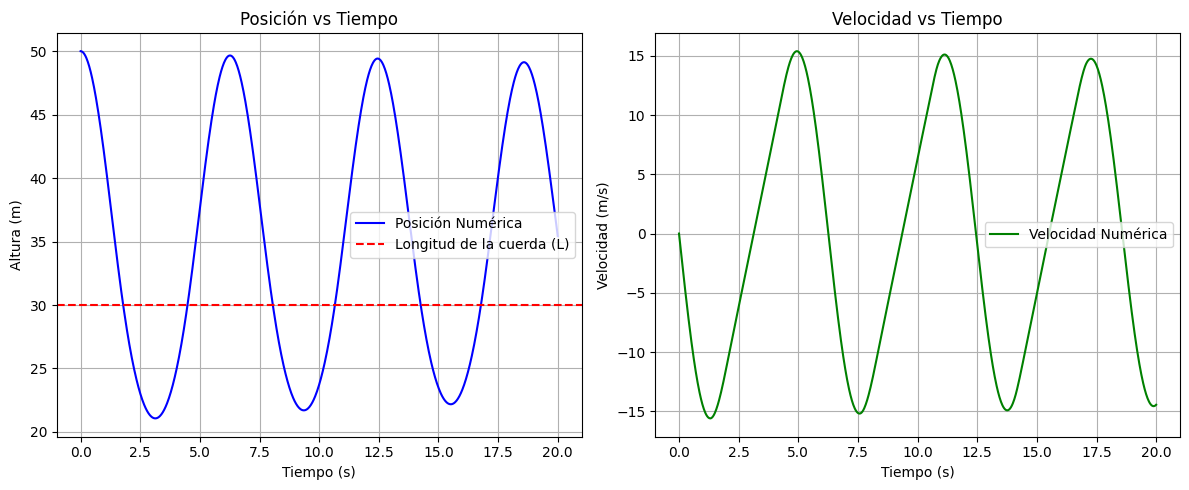

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros físicos
m = 70  # Masa del saltador (kg)
g = 9.81  # Aceleración de la gravedad (m/s^2)

# Parámetros de resistencia del aire
Cd = 0.7  # Coeficiente de arrastre para un humano en posición vertical
rho = 1.225  # Densidad del aire (kg/m^3)
D = 0.4  # Diámetro aproximado del cuerpo (m)
A = (np.pi / 4) * D**2  # Área frontal (m^2)
c = 0.5 * Cd * rho * A  # Coeficiente de arrastre aerodinámico

# Parámetros de la cuerda elástica
k = 100  # Constante elástica de la cuerda (N/m)
L = 30   # Longitud natural de la cuerda (m)

# Tiempo de simulación
t_span = (0, 20)  # Intervalo de tiempo (20 segundos para capturar oscilaciones)
t_vals = np.linspace(0, 20, 1000)  # Puntos de tiempo para la solución

# Condiciones iniciales
y0 = 50  # Altura inicial (m)
v0 = 0   # Velocidad inicial (m/s)

# Función de Heaviside
def Heaviside(x):
    return 1 if x > 0 else 0

# Ecuaciones diferenciales del sistema
def ecuacion_movimiento(t, Y):
    y, v = Y  # Separar variables de estado
    resistencia = (c/m) * v * abs(v)  # Fuerza de arrastre aerodinámica
    fuerza_elastica = (k/m) * (y - L) * Heaviside(y - L)  # Ley de Hooke solo si y > L
    dv_dt = g - resistencia - fuerza_elastica  # Segunda ley de Newton
    dy_dt = v  # Velocidad es la derivada de la posición
    return [dy_dt, dv_dt]

# Resolver la ecuación diferencial
sol = solve_ivp(ecuacion_movimiento, t_span, [y0, v0], t_eval=t_vals, method='RK45')

# Extraer soluciones
y_numerica = sol.y[0]
v_numerica = sol.y[1]

# Graficar resultados
plt.figure(figsize=(12, 5))

# Gráfico de posición
plt.subplot(1, 2, 1)
plt.plot(t_vals, y_numerica, label="Posición Numérica", color="blue")
plt.axhline(L, linestyle="dashed", color="red", label="Longitud de la cuerda (L)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (m)")
plt.title("Posición vs Tiempo")
plt.legend()
plt.grid()

# Gráfico de velocidad
plt.subplot(1, 2, 2)
plt.plot(t_vals, v_numerica, label="Velocidad Numérica", color="green")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs Tiempo")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Multiples saltadores

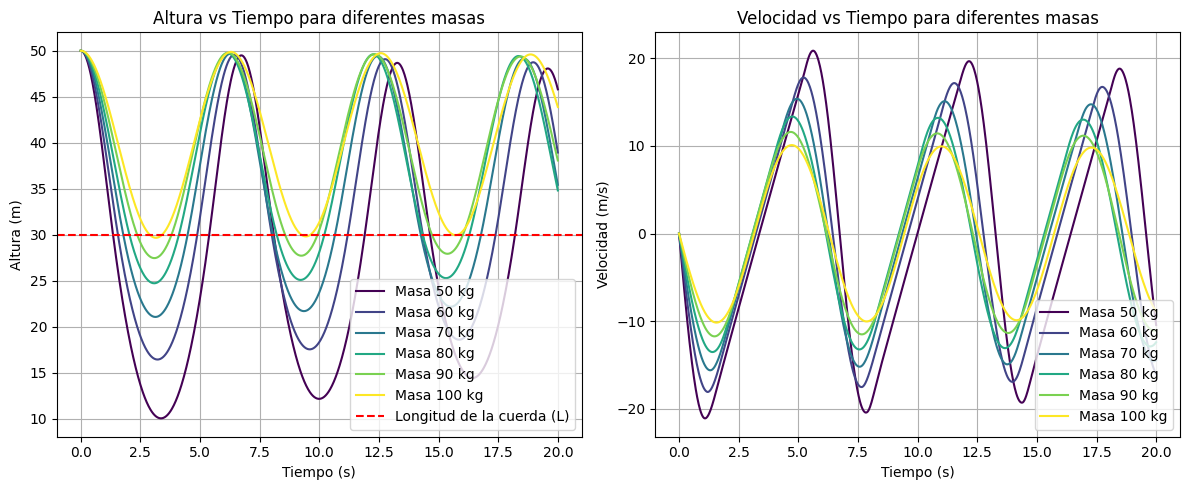

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros físicos (constantes)
g = 9.81  # Aceleración de la gravedad (m/s^2)
Cd = 0.7  # Coeficiente de arrastre
rho = 1.225  # Densidad del aire (kg/m^3)
D = 0.4  # Diámetro del cuerpo (m)
A = (np.pi / 4) * D**2  # Área frontal (m^2)
k = 100  # Constante elástica de la cuerda (N/m)
L = 30   # Longitud natural de la cuerda (m)

# Rango de masas del saltador
masas = np.arange(50, 110, 10)  # De 50 kg a 100 kg en pasos de 10 kg
colores = plt.cm.viridis(np.linspace(0, 1, len(masas)))  # Colores para cada masa

# Tiempo de simulación
t_span = (0, 20)  # Tiempo total de simulación
t_vals = np.linspace(0, 20, 1000)  # Puntos de tiempo evaluados

# Función de Heaviside
def Heaviside(x):
    return 1 if x > 0 else 0

# Ecuación diferencial del movimiento
def ecuacion_movimiento(t, Y, m):
    y, v = Y
    c = 0.5 * Cd * rho * A  # Coeficiente de arrastre aerodinámico (depende de A)
    resistencia = (c/m) * v * abs(v)  # Fuerza de arrastre
    fuerza_elastica = (k/m) * (y - L) * Heaviside(y - L)  # Ley de Hooke solo si y > L
    dv_dt = g - resistencia - fuerza_elastica
    dy_dt = v
    return [dy_dt, dv_dt]

# Crear la figura y los ejes para graficar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Dos gráficos en una fila

# Simulación para cada masa
for i, m in enumerate(masas):
    # Condiciones iniciales
    y0 = 50  # Altura inicial (m)
    v0 = 0   # Velocidad inicial (m/s)

    # Resolver la ecuación diferencial
    sol = solve_ivp(ecuacion_movimiento, t_span, [y0, v0], args=(m,), t_eval=t_vals, method='RK45')

    # Extraer soluciones
    y_numerica = sol.y[0]
    v_numerica = sol.y[1]

    # Graficar altura vs tiempo
    axs[0].plot(t_vals, y_numerica, label=f"Masa {m} kg", color=colores[i])

    # Graficar velocidad vs tiempo
    axs[1].plot(t_vals, v_numerica, label=f"Masa {m} kg", color=colores[i])

# Configurar los gráficos
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Altura (m)")
axs[0].set_title("Altura vs Tiempo para diferentes masas")
axs[0].axhline(L, linestyle="dashed", color="red", label="Longitud de la cuerda (L)")
axs[0].legend()
axs[0].grid()

axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Velocidad (m/s)")
axs[1].set_title("Velocidad vs Tiempo para diferentes masas")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()